In [21]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Partial Differential Equations

* In addition to spatially 2- and 3-dimensional problems (*e.g.*, electrostatics problems), many physical systems evolve in both space and time, so partial differential equations are an important part of computational physics.

* General form for a PDE with two independent variables is

$$A \frac{\partial^2 U}{\partial x^2}+ B \frac{\partial^2 U}{\partial
x \partial y}+C \frac{\partial^2 U}{\partial y^2} + D \frac{\partial U}{\partial x}+E
\frac{\partial U}{\partial y} =F$$

The table from your textbook shows the classes of PDE’s by the
value of the discriminant $d=AC-B^2$.

|   *Elliptic (general form)*   | *Parabolic (general form)* | *Hyperbolic (general form)* | 
| :----------: | :-----------: | :------------: | 
| $d=AC-B^2>0$ | $d=AC-B^2=0$ | $d=AC-B^2<0$ |
| $\nabla^2 U(x) = -4\pi\rho(x)$ | $\nabla^2 U(\mathbf{x},t) =a \partial U/\partial t$        | $\nabla^2 U(\mathbf{x},t)=c^{-2}\partial^2 U/\partial t^2\mbox{}$  |
|Poisson's eqn| Heat eqn | Wave eqn|

We'll do some of each, starting with Poisson's equation.


#### Boundary conditions are essential

(BTW, for ODEs, we so far specified initial values. We could, instead, need to specify boundary conditions at later times or other places --  this involves guessing the initial values and updating them based on the mismatch with the boundary condition, so it's a form of search. We'll try to return to that topic later in the quarter. See chapter 9 of your textbook.)

Boundary condition types:

* *Dirichlet*: specify the value of the solution on a surrounding closed surface,
* *Neumann*: specify the value of the normal derivative on the surrounding surface, 
* *Cauchy*: combination of the above.


We'll focus on solving these with **finite difference** methods. See Chapter 19 of your textbook.
* For a brief summary of finite element methods (FEM, or sometimes FEA (analysis), not to be confused with FMEA (Failure Modes and Effects Analysis)), and why we focus here on finite difference methods, see Chapter 23.
    * finite-element modeling is the real-world standard, generally, but built on separate, application-specific packages.

## Application: Electrostatic Potentials and Electric Fields

Recall, the solution for an electrostatic potential,  $U$ (your book's notation), satisfies Poisson's equation

$$\nabla^2 U(\textbf{x}) = - 4 \pi \rho(\textbf{x})$$

Notice the $cgs$ units. If the region has no charge density, $\rho=0$, we have Laplace's equation.

Example: find the electric potential for all points inside the charge-free square shown below. 

<img src="Figures/Figure_19.1a.png" width="40%">

The bottom and sides of the region are “grounded” (kept at 0V by wires). The top wire is connected to a voltage source that keeps it at 100 V. These provide a Dirichlet closed surface condition.

Work in cartesian coordinates:

$$\frac{\partial^2 U(x,y)}{\partial x^2}+ \frac{\partial^2
U(x,y)}{\partial y^2 } = - 4 \pi \rho(\textbf{x})$$


**Technique**

Recall, for the ODE, we defined a 1-dimensional grid and stepped the independent variable (*e.g.*, time) and found the value of the solution step-wise.

Generalize for this PDE: segment the 2-D space into a grid (aka a lattice), and solve for $U$ at each point. This is an approximation, as the points are not infinitesimally close together.

<img src="Figures/Figure_19.3.png" width="50%">

Note: there are no cross terms like $\partial U/\partial x \partial y$ in Poisson's equation, so we can treat the steps in $x$ and $y$ as separate.

Expanding $U$ in the $\pm x$ direction about the point $(x,y)$.

$$\begin{align}
U(x +\Delta x, y) & = U(x,y) + \frac{\partial U}{\partial x}\Delta x + \frac{1}{2}
\frac{\partial^2 U}{\partial x^2}(\Delta x)^2 + \cdots \\
U(x -\Delta x, y) & = U(x,y) - \frac{\partial U}{\partial x}
\Delta x + \frac{1} {2} \frac{\partial^2 U}{\partial x^2} (\Delta
x)^2 - \cdots\\
\end{align}$$

and doing the same for the $y$ direction.

$$\begin{align}
U(x, y +\Delta y) & = U(x,y) + \frac{\partial
U}{\partial y}\Delta y + \frac{1}{2} \frac{\partial^2 U}{\partial y^2}(\Delta y)^2 +
\cdots\\
U(x, y -\Delta y) & = U(x,y) - \frac{\partial U}{\partial y}
\Delta y + \frac{1} {2} \frac{\partial^2 U}{\partial y^2} (\Delta
y)^2 - \cdots
\end{align}$$

Adding these equations in pairs, all of the $\Delta x$ and $\Delta y$ terms cancel.

The result is just the differencing algorithm for second derivatives:

$$\begin{align}
\frac{\partial^2 U(x,y)}{\partial x^2}& \simeq   \frac{U(x+\Delta
x,y)+U(x-\Delta x,y)-2 U(x,y)}{(\Delta x)^2}\\
\frac{\partial^2 U(x,y)}{\partial y^2} & \simeq   \frac{U(x,y+\Delta y) +U(x, y-\Delta y)-2 U(x,y)}{(\Delta
y)^2}
\end{align}$$

Substitute this second-derivative approximation into the differential equation:

$$\begin{align}
&\frac{U(x+\Delta x,y) + U(x-\Delta x,y)-2 U(x,y)}{(\Delta x)^2}\\
&\qquad + \frac{U(x,y+\Delta y) + U(x,y-\Delta y)-2 U(x,y)}{(\Delta y)^2} =
-4\pi\rho
\end{align}$$ 

Let $\Delta x = \Delta y = h$ (usually square grid): 

$${U(x+h,y) + U(x-h,y)}+ {U(x,y+h) +
U(x,y-h)- 4 U(x,y) } =  -4\pi\rho h^2$$
  
The solution for $U(x_i, y_j)$ is 

$$\boxed{U_{i,j} =\frac{1}{4} \left[U_{i+1,j}+U_{i-1,j}
 + U_{i,j+1} + U_{i,j-1} \right]+ \pi\rho_{i,j}h^2}$$
 

When $\rho=0$, **this is just the result you proved in Electricity and Magnetism class in three spatial dimensions: a solution to Laplace's equation has the property that the value at any point is equal to the average value over a sphere of any radius (contained in the region) centered at that point**. In other words, we can construct an iterative  algorithm:
* initialize: guess the values for every point in the grid.
* walk: replace each point's value by the average of the nearest neighbor values
* iterate to convergence

This is called "relaxation" to the solution.

Recall also the uniqueness theorem.

Note: in the Poisson case, the $h^2$ factor comes about because $\rho$ is  a charge density (charge per area), and we set it accordingly to represent the charge in the small but finite area. Put another way, what matters is the boundary condition that the charge provides for $U$ at the neighboring sites.


There are two options here:
* immediately use the new value at a site when calculating a neighbor's new value. Called Gauss-Seidel method. This is usually best.
* wait until all sites in the grid have been updated before using the new values. Called Jacobi method.

There is an impatiant (greedy?) variant of Gauss-Seidel called "over relaxation". The idea is to compare the current value with the average value of the nearest neighbors and then update with a correction that is *larger* than that difference by some (relatively small) factor. Depending on the situation, this can lead to faster convergence.

Anyway, we'll use the Gauss-Seidel method for our problem, with $\rho=0$ everywhere and spacing $h=1$.


<IPython.core.display.Javascript object>


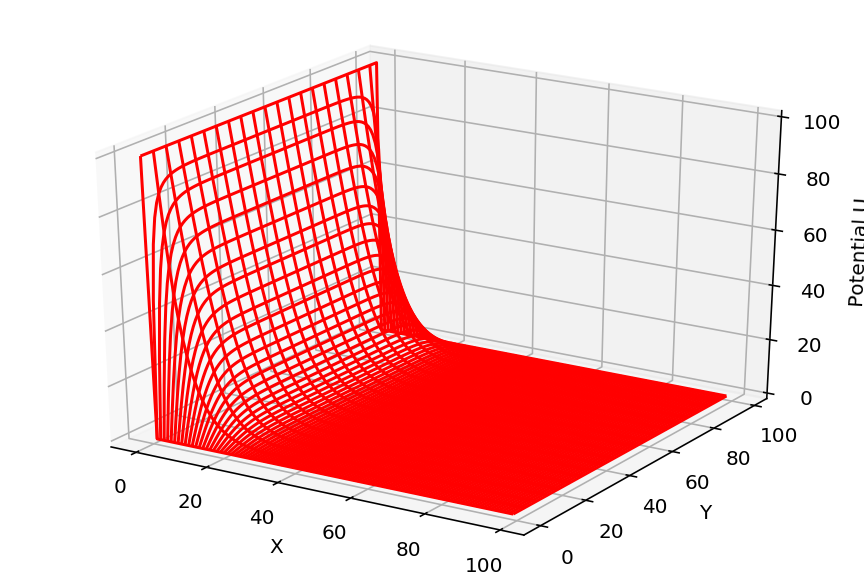

In [22]:
%matplotlib notebook
# LaplaceLine.py, Notebook Version

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Nmax = 100
Niter = 100
V = np.zeros((Nmax, Nmax))   

for k in range(0, Nmax-1): 
    V[0,k] = 100.0                              # fixed potential line at 100V
    
for iter in range(Niter):                       # iterations over algorithm
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])  
x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig)                                # plot axes
ax.plot_wireframe(X, Y, Z, color = 'r', rstride=5, cstride=1)  # red wireframe, setting the stride values explicitly
ax.set_xlabel('X')                              # label axes
ax.set_ylabel('Y')
ax.set_zlabel('Potential U')
plt.show()  

Looks sensible, and this is much easier than the series expansions we did in 110A. 

Note, we could either require some number of iterations, as implemented here, or -- better -- require the solution to have converged by testing the maximum change in the grid values.

We often want the electric field, which is a vector field. Recall that 

$$\vec{E}=-\nabla U(x,y)=-\frac{\partial U(x,y)}{\partial x}\hat\epsilon_x-\frac{\partial U(x,y)}{\partial y}\hat\epsilon_y$$

so with the two-dimensional array of $U(x,y)$, one can obtain

$$E_x \approx \frac{U_{i+1,j}-U_{i-1,j}}{2\Delta}$$

*i.e.,*  the central-difference approximation for the derivative, and similarly for $E_y$. You then have the vector field you can plot. Recall how we plotted vector fields in phase space.

It may be useful also to draw contours of equipotential. The electric field lines are perpendicular to equipotential surfaces.


Can easily change boundary conditions: instead require that the left edge of the square also be kept at 100 V.

<IPython.core.display.Javascript object>


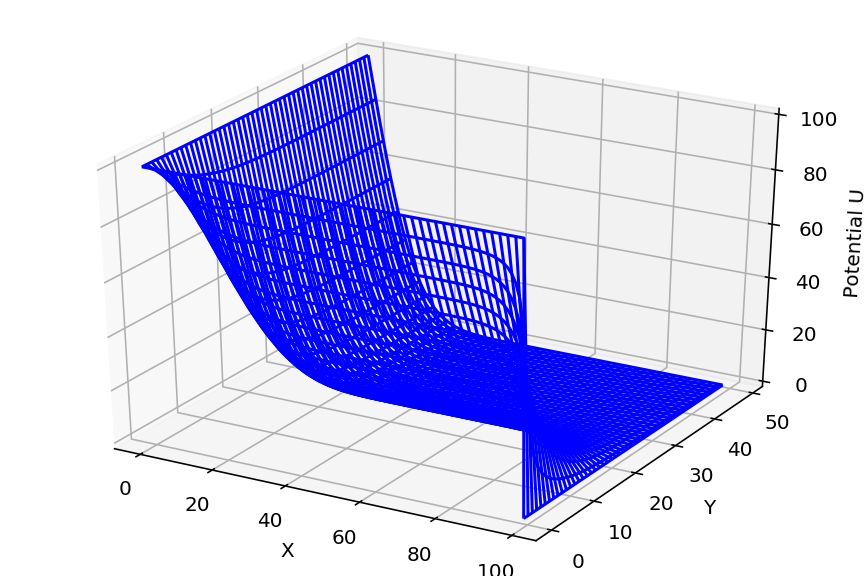

In [19]:
%matplotlib notebook
# LaplaceLine.py, Notebook Version

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Nmax = 100
Niter = 100
V = np.zeros((Nmax, Nmax))   

for k in range(0, Nmax-1): 
    V[k,0] = 100.0                              # fixed potential line at 100V
    V[0,k] = 100.0
    
for iter in range(Niter):                       # iterations over algorithm
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])  
x = range(0, Nmax)
y = range(0, 50)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig)                                # plot axes
ax.plot_wireframe(X, Y, Z, color = 'b')         
ax.set_xlabel('X')                              # label axes
ax.set_ylabel('Y')
ax.set_zlabel('Potential U')
plt.show()  

* Notice the funny curl that happens at the front corner of this 3-D plot. Why is that there?
* Now place charge in the middle:

<IPython.core.display.Javascript object>


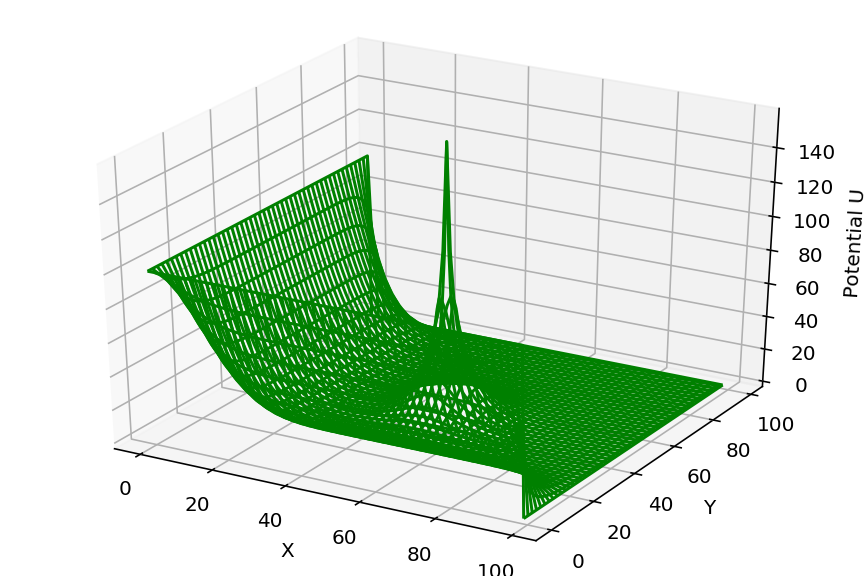

In [20]:
%matplotlib notebook
# Poisson's equation

Nmax = 100
Niter = 100
V = np.zeros((Nmax, Nmax))   

def rho(i,j):
    if (i==50 and j==50):
        return 20.
    else:
        return 0.

for k in range(0, Nmax-1): 
    V[k,0] = 100.0                              # fixed potential line at 100V
    V[0,k] = 100.0
    
for iter in range(Niter):                       # iterations over algorithm
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1]) + np.pi*rho(i,j)  
x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig)                                # plot axes
ax.plot_wireframe(X, Y, Z, color = 'g')         
ax.set_xlabel('X')                              # label axes
ax.set_ylabel('Y')
ax.set_zlabel('Potential U')
plt.show()  

Eiffel Tower? 

As already noted, we distribute the point charge over a cell to avoid the divergence. We don't expect the result to be good on distance scales much smaller than one cell anyway. What matters is that the point charge creates the correct boundary condition for the neighboring cells. (We effectively also did this at the boundaries, where charges must reside to create the boundary conditions.)


#### One more thing: Laplace's quation in polar coordinates

If the boundary is a circle, probably want to use *polar coordinates*.

Laplace's equation in polar coordinates:

$$\frac{\partial^2 U}{\partial r^2} + \frac{1}{r} \frac{\partial U}{\partial r} + \frac{1}{r^2} \frac{\partial^2 U}{\partial \theta^2} = 0$$

* two second derivatives, one each in $r$ and $\theta$, that can be approximated with the midpoint algorithm.
* one first derivative in $r$ that can be approximated by a central difference algorithm.

With indices are written for grid points $(r_i, \theta_j)$, we have

$$\begin{align}
\frac{\partial^2 U}{\partial r^2} &= \frac{U_{i-1,j} - 2U_{i,j} + U_{i+1,j}}{(\Delta r)^2} \\
\frac{1}{r^2} \frac{\partial^2 U}{\partial \theta^2} &= \frac{1}{r_i^2} \frac{U_{i,j-1} - 2U_{i,j} + U_{i,j+1}}{(\Delta \theta)^2} \\
\frac{1}{r} \frac{\partial U}{\partial r} &= \frac{1}{r_i} \frac{U_{i+1,j} - U_{i-1,j}}{2\Delta r} \\
\end{align}$$

Plugging into Laplace's equation and solving for $U_{i,j}$:

$$U_{i,j} = \left( \frac{2}{(\Delta r)^2} + \frac{2}{r^2 (\Delta \theta)^2} \right)^{-1} 
\left[ \frac{U_{i-1, j} + U_{i+1,j}}{(\Delta r)^2} + \frac{U_{i, j-1} + U_{i, j+1}}{r_1^2 (\Delta \theta)^2}
+ \frac{U_{i+1,j} - U_{i-1, j}}{2r_i \Delta r}\right]$$

Remember: this is not a rectilear coordinate system, so must be careful with the interval spacings. (Think about what happens at large $r$ for fixed $\Delta \theta$). In addition, notice

* $\theta$ has a periodic boundary condition, so that "wrap-around" must be included in the calculation. In other words, some care must be taken for the values at $j=0$ and $j=Nmax-1$. Handling these as special cases outside the `for` loop is fine.
* the $r=0$ point can be tricky, depending on the other boundary conditions. 

The Jacobi method is most straightforward here.

There are many more sophisticated methods. See, e.g., [here](https://onlinelibrary.wiley.com/doi/epdf/10.1002/num.1038).

---------
---------
Let's have a look together at the [Project Proposal assignment](https://canvas.ucsc.edu/courses/21972/assignments/71993)